In [48]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [49]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Creating dataframes

In [50]:
df_2019 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/CS6140/project/songs_2019_metrics_csv.csv', index_col=[0])
df_2020 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/CS6140/project/songs_2020_metrics_csv.csv', index_col=[0])
df_2021 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/CS6140/project/songs_2021_metrics_csv.csv', index_col=[0])

In [51]:
df_2019

,id,songs,song,artist,energy,dance,liveness,valence,tempo,instrumental,acoustic,popularity,genres,sentiments
0,1,Old Town Road Lil Nas X Billy Ray Cyrus,Old Town Road - Remix,Lil Nas X,0.619,0.878,0.1130,0.639,136.041,0.000000,0.05330,81,"['lgbtq+ hip hop', 'pop']",0.431344
1,2,Sunflower Post Malone and Swae Lee,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,0.479,0.760,0.0703,0.913,89.911,0.000000,0.55600,84,"['dfw rap', 'melodic rap', 'rap']",0.325720
2,3,Without Me Halsey,Without Me,Halsey,0.488,0.752,0.0936,0.533,136.041,0.000009,0.29700,79,"['dance pop', 'electropop', 'etherpop', 'indie...",0.392288
3,4,Bad Guy Billie Eilish,bad guy,Billie Eilish,0.425,0.701,0.1000,0.562,135.128,0.130000,0.32800,85,"['art pop', 'electropop', 'pop']",0.000000
4,5,Wow Post Malone,Wow.,Post Malone,0.539,0.829,0.1030,0.388,99.960,0.000002,0.13600,80,"['dfw rap', 'melodic rap', 'rap']",0.779044
5,6,Happier Marshmello and Bastille,Happier,Marshmello,0.792,0.687,0.1670,0.671,100.011,0.000000,0.19100,25,"['brostep', 'dance pop', 'edm', 'pop', 'pop da...",0.662268
6,7,7 Rings Ariana Grande,7 rings,Ariana Grande,0.317,0.778,0.0881,0.327,140.048,0.000000,0.59200,85,"['dance pop', 'pop']",0.659706
7,8,Talk Khalid,Talk (feat. Disclosure),Khalid,0.400,0.900,0.0599,0.346,135.984,0.000000,0.05160,73,"['pop', 'pop r&b']",0.334460
8,9,Sicko Mode Travis Scott,SICKO MODE,Travis Scott,0.730,0.834,0.1240,0.446,155.008,0.000000,0.00513,83,"['hip hop', 'rap', 'slap house']",0.506228
9,10,Sucker Jonas Brothers,Sucker,Jonas Brothers,0.734,0.842,0.1060,0.952,137.958,0.000000,0.04270,81,"['boy band', 'dance pop', 'pop', 'post-teen pop']",0.313236


In [52]:
df_2019 = df_2019.drop(columns=['id', 'songs', 'song', 'artist', 'genres'])
df_2020 = df_2020.drop(columns=['id', 'songs', 'song', 'artist', 'genres'])
df_2021 = df_2021.drop(columns=['id', 'songs', 'song', 'artist', 'genres'])

In [86]:
df_2019

,energy,dance,liveness,valence,tempo,instrumental,acoustic,popularity,sentiments
0,0.619,0.878,0.1130,0.639,136.041,0.000000,0.05330,81,0.431344
1,0.479,0.760,0.0703,0.913,89.911,0.000000,0.55600,84,0.325720
2,0.488,0.752,0.0936,0.533,136.041,0.000009,0.29700,79,0.392288
3,0.425,0.701,0.1000,0.562,135.128,0.130000,0.32800,85,0.000000
4,0.539,0.829,0.1030,0.388,99.960,0.000002,0.13600,80,0.779044
5,0.792,0.687,0.1670,0.671,100.011,0.000000,0.19100,25,0.662268
6,0.317,0.778,0.0881,0.327,140.048,0.000000,0.59200,85,0.659706
7,0.400,0.900,0.0599,0.346,135.984,0.000000,0.05160,73,0.334460
8,0.730,0.834,0.1240,0.446,155.008,0.000000,0.00513,83,0.506228
9,0.734,0.842,0.1060,0.952,137.958,0.000000,0.04270,81,0.313236


# Explained Variance vs Principal Components

In [ ]:
df_2019normalized=(df_2019 - df_2019.mean()) / df_2019.std()
pca_2019 = PCA(n_components=df_2019.shape[1])
pca_2019.fit(df_2019normalized)

loadings = pd.DataFrame(pca_2019.components_.T,
columns=['PC%s' % _ for _ in range(len(df_2019normalized.columns))],
index=df_2019.columns)
print(loadings)

In [ ]:
df_2020normalized=(df_2020 - df_2020.mean()) / df_2020.std()
pca_2020 = PCA(n_components=df_2020.shape[1])
pca_2020.fit(df_2020normalized)

loadings = pd.DataFrame(pca_2020.components_.T,
columns=['PC%s' % _ for _ in range(len(df_2020normalized.columns))],
index=df_2020.columns)
print(loadings)

In [ ]:
df_2021normalized=(df_2021 - df_2021.mean()) / df_2021.std()
pca_2021 = PCA(n_components=df_2021.shape[1])
pca_2021.fit(df_2021normalized)

loadings = pd.DataFrame(pca_2021.components_.T,
columns=['PC%s' % _ for _ in range(len(df_2021normalized.columns))],
index=df_2021.columns)
print(loadings)

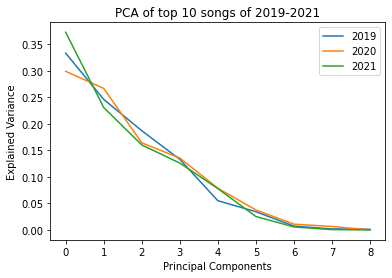

In [57]:
plt.plot(pca_2019.explained_variance_ratio_, label = "2019")
plt.plot(pca_2020.explained_variance_ratio_, label = "2020")
plt.plot(pca_2021.explained_variance_ratio_, label = "2021")
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.title("PCA of top 10 songs of 2019-2021")
plt.legend()
plt.show()

# Heatmap

In [ ]:
df_st2019 = StandardScaler().fit_transform(df_2019)

pca_out2019 = PCA().fit(df_st2019)

loadings_2019 = pca_out2019.components_
num_pc2019 = pca_out2019.n_features_
pc_list2019 = ["PC"+str(i) for i in list(range(1, num_pc2019+1))]
loadings_df2019 = pd.DataFrame.from_dict(dict(zip(pc_list2019, loadings_2019)))
loadings_df2019['variable'] = df_2019.columns.values
loadings_df2019 = loadings_df2019.set_index('variable')

In [ ]:
df_st2020 = StandardScaler().fit_transform(df_2020)

pca_out2020 = PCA().fit(df_st2020)

loadings_2020 = pca_out2020.components_
num_pc2020 = pca_out2020.n_features_
pc_list2020 = ["PC"+str(i) for i in list(range(1, num_pc2020+1))]
loadings_df2020 = pd.DataFrame.from_dict(dict(zip(pc_list2020, loadings_2020)))
loadings_df2020['variable'] = df_2020.columns.values
loadings_df2020 = loadings_df2020.set_index('variable')
loadings_df2020

In [ ]:
df_st2021 = StandardScaler().fit_transform(df_2021)

pca_out2021 = PCA().fit(df_st2021)

loadings_2021 = pca_out2021.components_
num_pc2021 = pca_out2021.n_features_
pc_list2021 = ["PC"+str(i) for i in list(range(1, num_pc2021+1))]
loadings_df2021 = pd.DataFrame.from_dict(dict(zip(pc_list2021, loadings_2021)))
loadings_df2021['variable'] = df_2021.columns.values
loadings_df2021 = loadings_df2021.set_index('variable')
loadings_df2021

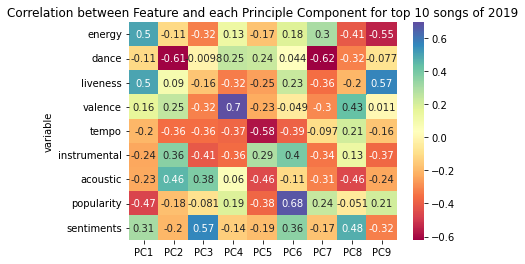

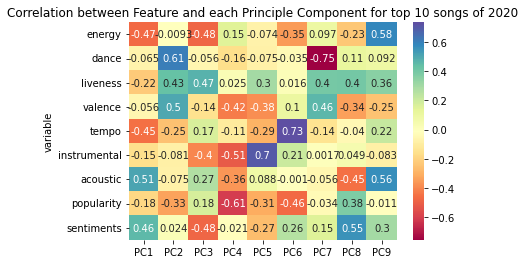

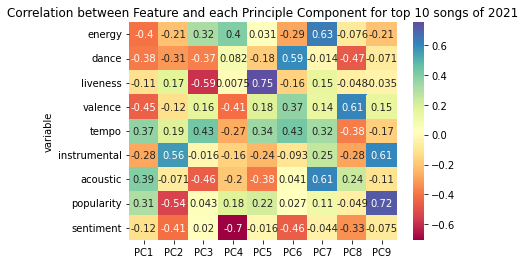

In [88]:
ax_2019 = sns.heatmap(loadings_df2019, annot=True, cmap='Spectral')
plt.title('Correlation between Feature and each Principle Component for top 10 songs of 2019')
plt.show()

ax_2020 = sns.heatmap(loadings_df2020, annot=True, cmap='Spectral')
plt.title('Correlation between Feature and each Principle Component for top 10 songs of 2020')
plt.show()

ax_2021 = sns.heatmap(loadings_df2021, annot=True, cmap='Spectral')
plt.title('Correlation between Feature and each Principle Component for top 10 songs of 2021')
plt.show()

# first 2 Principal Components

In [68]:
scaler = StandardScaler()
scaler.fit(df_2019)
scaled_data_2019 = scaler.transform(df_2019)

pca_2019 = PCA(n_components=2)
pca_2019.fit(scaled_data_2019)

x_pca2019 = pca_2019.transform(scaled_data_2019)

In [69]:
scaler = StandardScaler()
scaler.fit(df_2020)
scaled_data_2020 = scaler.transform(df_2020)

pca_2020 = PCA(n_components=2)
pca_2020.fit(scaled_data_2020)

x_pca2020 = pca_2020.transform(scaled_data_2020)


In [70]:
scaler = StandardScaler()
scaler.fit(df_2021)
scaled_data_2021 = scaler.transform(df_2021)

pca_2021 = PCA(n_components=2)
pca_2021.fit(scaled_data_2021)

x_pca2021 = pca_2021.transform(scaled_data_2021)

Text(0.5, 1.0, 'PCA of top 10 songs of each year from 9 dimensions to 2 dimensions')

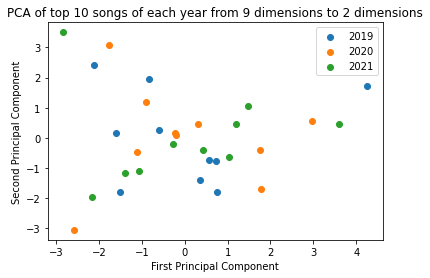

In [92]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x_pca2019[:,0],x_pca2019[:,1], label = "2019")
ax1.scatter(x_pca2020[:,0],x_pca2020[:,1], label = "2020")
ax1.scatter(x_pca2021[:,0],x_pca2021[:,1], label = "2021")
plt.legend();
plt.xlabel('First Principal Component');
plt.ylabel('Second Principal Component');
plt.title('PCA of top 10 songs of each year from 9 dimensions to 2 dimensions')

# Heatmap

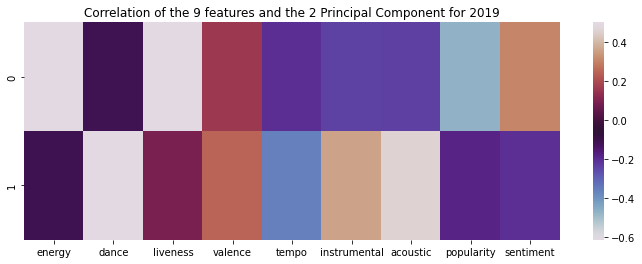

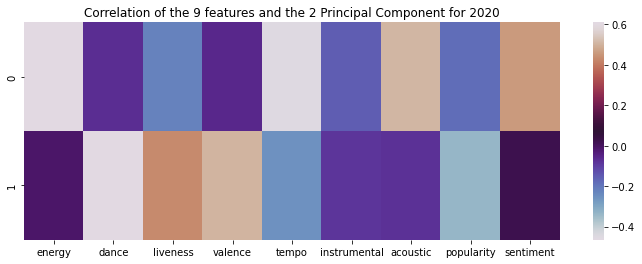

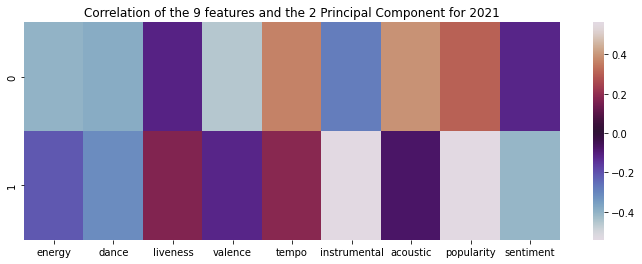

In [96]:
map= pd.DataFrame(pca_2019.components_, columns = ['energy', 'dance', 'liveness', 'valence', 'tempo', 'instrumental', 'acoustic', 'popularity', 'sentiment' ] )
plt.figure(figsize=(12,4))
plt.title('Correlation of the 9 features and the 2 Principal Component for 2019')
sns.heatmap(map,cmap='twilight')

map= pd.DataFrame(pca_2020.components_, columns = ['energy', 'dance', 'liveness', 'valence', 'tempo', 'instrumental', 'acoustic', 'popularity', 'sentiment' ])
plt.figure(figsize=(12,4))
plt.title('Correlation of the 9 features and the 2 Principal Component for 2020')
sns.heatmap(map,cmap='twilight')

map= pd.DataFrame(pca_2021.components_, columns = ['energy', 'dance', 'liveness', 'valence', 'tempo', 'instrumental', 'acoustic', 'popularity', 'sentiment' ])
plt.figure(figsize=(12,4))
plt.title('Correlation of the 9 features and the 2 Principal Component for 2021')
sns.heatmap(map,cmap='twilight')